In [27]:
import tensorflow as tf 
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPool2D
import pickle
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
# from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [28]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [29]:
# to normalize the data - if number data we can scale and normalize the data 
# in our case it the images which we are going to normalize 
# so we the min and the max value 
# the min -> 0 and max -> 255

X = X/255.0 

print(X.shape,y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)


(1376, 60, 60, 1) (1376,)
(1032, 60, 60, 1) (344, 60, 60, 1) (1032,) (344,)


In [30]:
model = tensorflow.keras.Sequential()

#layer 1
# model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# # layer 2 
# model.add(Conv2D(64,(3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# # model.add(layers.Dense(1,activation = 'sigmoid'))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
# print(X.shape)

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history = model.fit(X_train, y_train, batch_size=10, epochs=epochs, validation_data=(X_test, y_test))



Epoch 1/10
104/104 [==============================] - 14s 131ms/step - loss: 0.6979 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4826
Epoch 2/10
104/104 [==============================] - 14s 132ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.4826
Epoch 3/10
104/104 [==============================] - 15s 147ms/step - loss: 0.6934 - accuracy: 0.4719 - val_loss: 0.6932 - val_accuracy: 0.4826
Epoch 4/10
104/104 [==============================] - 14s 135ms/step - loss: 0.6934 - accuracy: 0.4903 - val_loss: 0.6932 - val_accuracy: 0.4826
Epoch 5/10
104/104 [==============================] - 14s 132ms/step - loss: 0.6933 - accuracy: 0.4874 - val_loss: 0.6932 - val_accuracy: 0.4826
Epoch 6/10
104/104 [==============================] - 13s 125ms/step - loss: 0.6932 - accuracy: 0.5165 - val_loss: 0.6935 - val_accuracy: 0.4826
Epoch 7/10
104/104 [==============================] - 13s 124ms/step - loss: 0.6934 - accuracy: 0.5097 - val_loss: 0.6936 - val_ac

In [31]:
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
# history = model.fit(X,y,batch_size=32,epochs=10,validation_split=0.25)
# # model.fit(X,y,batch_size=40,validation_split=0.25)
model.save("mainmodel.h5")
print("saved Model")

saved Model


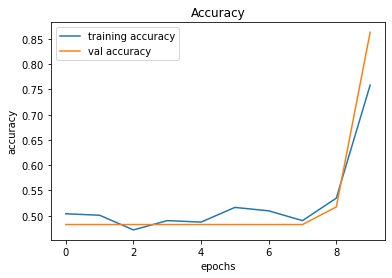

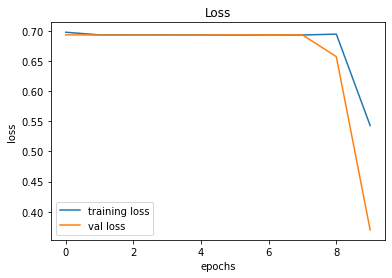

In [32]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.callbacks import TensorBoard
NAME = "MASK/Un-Mask"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

history1 = model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

Epoch 1/3
31/31 [==============================] - 13s 417ms/step - loss: 0.8484 - accuracy: 0.5130 - val_loss: 0.6937 - val_accuracy: 0.9734
Epoch 2/3
31/31 [==============================] - 11s 368ms/step - loss: 0.6933 - accuracy: 0.4901 - val_loss: 0.6932 - val_accuracy: 0.9903
Epoch 3/3
31/31 [==============================] - 11s 363ms/step - loss: 0.6932 - accuracy: 0.4860 - val_loss: 0.6932 - val_accuracy: 0.9903


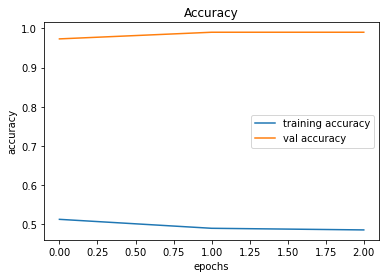

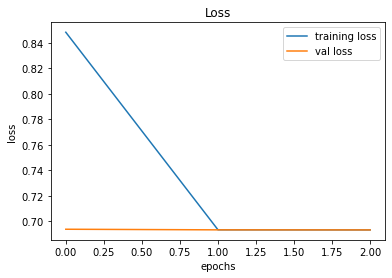

In [34]:
plt.figure(0)
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
import time
import tensorflow as tf 

dense_layers = [0,1,2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = tf.keras.models.Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

1-conv-32-nodes-0-dense-1589374634
2-conv-32-nodes-0-dense-1589374634
3-conv-32-nodes-0-dense-1589374634
1-conv-64-nodes-0-dense-1589374634
2-conv-64-nodes-0-dense-1589374634
3-conv-64-nodes-0-dense-1589374634
1-conv-128-nodes-0-dense-1589374634
2-conv-128-nodes-0-dense-1589374634
3-conv-128-nodes-0-dense-1589374634
1-conv-32-nodes-1-dense-1589374634
2-conv-32-nodes-1-dense-1589374634
3-conv-32-nodes-1-dense-1589374634
1-conv-64-nodes-1-dense-1589374634
2-conv-64-nodes-1-dense-1589374634
3-conv-64-nodes-1-dense-1589374634
1-conv-128-nodes-1-dense-1589374634
2-conv-128-nodes-1-dense-1589374634
3-conv-128-nodes-1-dense-1589374634
1-conv-32-nodes-2-dense-1589374634
2-conv-32-nodes-2-dense-1589374634
3-conv-32-nodes-2-dense-1589374634
1-conv-64-nodes-2-dense-1589374634
2-conv-64-nodes-2-dense-1589374634
3-conv-64-nodes-2-dense-1589374634
1-conv-128-nodes-2-dense-1589374634
2-conv-128-nodes-2-dense-1589374634
3-conv-128-nodes-2-dense-1589374634
1-conv-32-nodes-0-dense-1589374634
2-conv-32-n

In [36]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'],
                )

history2 = model.fit(X, y,
            batch_size=32,
            epochs=10,
            validation_split=0.3,
            callbacks=[tensorboard])

Epoch 1/10
31/31 [==============================] - 9s 285ms/step - loss: 0.5686 - accuracy: 0.7113 - val_loss: 1.1608 - val_accuracy: 0.0315
Epoch 2/10
31/31 [==============================] - 8s 243ms/step - loss: 0.3865 - accuracy: 0.8017 - val_loss: 0.6403 - val_accuracy: 0.7215
Epoch 3/10
31/31 [==============================] - 8s 254ms/step - loss: 0.2242 - accuracy: 0.9138 - val_loss: 0.2806 - val_accuracy: 0.9346
Epoch 4/10
31/31 [==============================] - 9s 277ms/step - loss: 0.1447 - accuracy: 0.9533 - val_loss: 0.6445 - val_accuracy: 0.7966
Epoch 5/10
31/31 [==============================] - 9s 292ms/step - loss: 0.1240 - accuracy: 0.9616 - val_loss: 0.2326 - val_accuracy: 0.9104
Epoch 6/10
31/31 [==============================] - 9s 290ms/step - loss: 0.0792 - accuracy: 0.9751 - val_loss: 0.1751 - val_accuracy: 0.9322
Epoch 7/10
31/31 [==============================] - 9s 294ms/step - loss: 0.0673 - accuracy: 0.9782 - val_loss: 0.1390 - val_accuracy: 0.9637
Epoch 

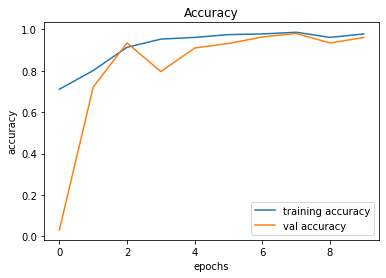

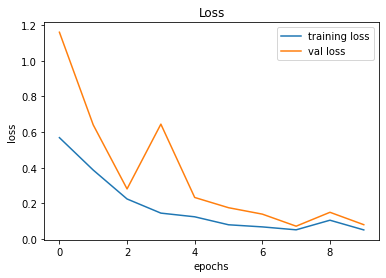

In [37]:
plt.figure(0)
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = tf.keras.models.Sequential()
            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            history3 = model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1589374726
Epoch 1/10
31/31 [==============================] - 5s 165ms/step - loss: 0.5928 - accuracy: 0.7134 - val_loss: 1.1262 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 4s 120ms/step - loss: 0.5303 - accuracy: 0.7124 - val_loss: 1.1246 - val_accuracy: 0.1380
Epoch 3/10
31/31 [==============================] - 4s 124ms/step - loss: 0.4510 - accuracy: 0.7715 - val_loss: 1.1610 - val_accuracy: 0.3075
Epoch 4/10
31/31 [==============================] - 4s 135ms/step - loss: 0.3173 - accuracy: 0.8588 - val_loss: 0.7145 - val_accuracy: 0.6344
Epoch 5/10
31/31 [==============================] - 4s 119ms/step - loss: 0.2067 - accuracy: 0.9211 - val_loss: 0.0986 - val_accuracy: 0.9685
Epoch 6/10
31/31 [==============================] - 4s 119ms/step - loss: 0.2131 - accuracy: 0.9107 - val_loss: 1.1568 - val_accuracy: 0.5375
Epoch 7/10
31/31 [==============================] - 4s 119ms/step - loss: 0.1818 - accuracy: 0.9439 - val_los

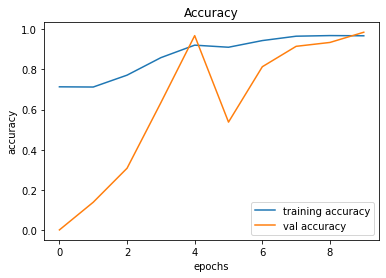

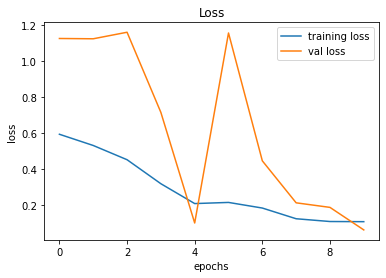

In [40]:
plt.figure(0)
plt.plot(history3.history['accuracy'], label='training accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history3.history['loss'], label='training loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()